<a href="https://colab.research.google.com/github/camythaocta/Stroke-Predictions_Imbalanced-Data/blob/main/Camytha_Octanuryati_Rochmad_Script_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The process to do with this project are:
1. Import libraries and load the data
2. Exploratory data analysis (EDA) which consists of preliminary look at the data, data cleansing, and data deep-dive understanding
3. Modelling machine learning

output: which parameters have the highest contributions to the prediction of people having stroke?

#Import Libraries and Load Data

In [ ]:
import pandas as pd #for data processing, data manipulation, read csv file
import matplotlib.pyplot as plt #for graphic
import seaborn as sns #for data visualization
import numpy as np #for linear algebra, data analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/dataset.csv')

#Exploratory Data Analysis

##Preliminary Look at the Data

###Sample of Data

In [ ]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
data.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [ ]:
data.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
27804,26345,Female,64.0,0,0,Yes,Self-employed,Urban,98.52,33.8,never smoked,0
30791,24471,Female,34.0,0,0,Yes,Private,Rural,85.76,26.3,never smoked,0
40799,57591,Female,61.0,0,0,Yes,Private,Rural,147.57,21.5,NaN,0
12409,18294,Female,4.0,0,0,No,children,Urban,87.21,18.0,NaN,0
40516,37542,Female,80.0,0,0,Yes,Govt_job,Urban,69.73,18.1,formerly smoked,0


1. `id` column is the key (identifier) of the dataset, meaningless to be explored further
2. No obvious defect on the data (column name vs its entries), all looks good

###General Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


1. Dataset contains 12 columns and 43400 rows
2. There are 7 numerical columns and 5 categorical columns
3. All, except `bmi` and `smoking_status` columns, has some missing values
4. All dtypes is appropriate, given the corresponding column name

##Data Cleansing

###Missing Value Handling

In [ ]:
## number of missing values per column
data_NaN_missing = data.isna().sum()
data_NaN_missing

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
data_NaN_missing / len(data) * 100

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

There is no column that has more than 35% `NaN` missing values. Therefore, none of the columns need to be dropped. In the other hand, the imputation is conducted.

In [ ]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())

In [ ]:
data['smoking_status'] = data['smoking_status'].fillna(data['smoking_status'].mode()[0])

In [ ]:
#sanity check
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Success removing NULL values. However, in `.isna()`, only `NaN` missing value is handled. Therefore, it is still needed to check the other types of missing value in the dataset.

In [ ]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= id =================


2047     1
42270    1
66858    1
7465     1
25894    1
        ..
64106    1
57961    1
37479    1
35428    1
67585    1
Name: id, Length: 43400, dtype: int64


============= gender =================


Female    25665
Male      17724
Other        11
Name: gender, dtype: int64


============= age =================


51.00    738
52.00    721
53.00    701
78.00    698
50.00    694
        ... 
0.48      37
0.40      35
1.00      34
0.16      26
0.08      17
Name: age, Length: 104, dtype: int64


============= hypertension =================


0    39339
1     4061
Name: hypertension, dtype: int64


============= heart_disease =================


0    41338
1     2062
Name: heart_disease, dtype: int64


============= ever_married =================


Yes    27938
No     15462
Name: ever_married, dtype: int64


============= work_type =================


Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64


============= Residence_type =================


Urban    21756
Rural    21644
Name: Residence_type, dtype: int64


============= avg_glucose_level =================


82.71     19
87.07     18
72.53     18
84.40     17
90.71     17
          ..
202.11     1
121.82     1
138.99     1
152.24     1
160.00     1
Name: avg_glucose_level, Length: 12543, dtype: int64


============= bmi =================


27.7    1733
27.6     267
26.8     266
26.1     265
27.1     260
        ... 
10.1       1
67.0       1
11.2       1
97.6       1
65.2       1
Name: bmi, Length: 555, dtype: int64


============= smoking_status =================


never smoked       29345
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64


============= stroke =================


0    42617
1      783
Name: stroke, dtype: int64

There is no strange value in each column. Therefore, now the dataset is clean from missing value.

In [ ]:
100 * len(data[data['gender']=='Other']) / len(data)

0.02534562211981567

However, 'Other' in `gender` is only 0.025% of the data. Therefore, it can be omitted and focus on 'Female' and 'Male'

In [ ]:
data = data[data.gender != 'Other']

###Duplicate Rows Handling

In [ ]:
## number of duplicated data
data.duplicated().sum()

0

There is no duplicate rows in the dataset.

##Data deep-dive understanding

###Statistical Summary

In [ ]:
numericals = ['id','age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']
categoricals = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [ ]:
data[numericals].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000
mean,36326.360760,42.219747,0.093595,0.047524,104.486760,28.574740,0.018046
std,21073.474716,22.520750,0.291268,0.212758,43.115157,7.640258,0.133119
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18034.000000,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,36352.000000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54516.000000,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


1. `id` is the unique key
2. `hypertension`, `heart_disease`, and `stroke` are boolean columns
3. Overall, the minimum and maximum values make sense for each column 
4. Mean ~ 50% (Median) in `age` and `bmi` column, indicating somewhat a symmetrical distribution
5. Mean >> 50% (Median) in `avg_glucose_level`, indicating it is positively skewed distribution

`id` column is the identifier, so it is meaningless to process further. Therefore, this column needs to be omitted. 

In [ ]:
data = data.drop(columns='id')

In [ ]:
data[categoricals].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,43389,43389,43389,43389,43389
unique,2,2,5,2,3
top,Female,Yes,Private,Urban,never smoked
freq,25665,27933,24827,21751,29341


In [ ]:
# showing the precise value counts
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of gender column
Female    25665
Male      17724
Name: gender, dtype: int64 

Value counts of ever_married column
Yes    27933
No     15456
Name: ever_married, dtype: int64 

Value counts of work_type column
Private          24827
Self-employed     6793
children          6154
Govt_job          5438
Never_worked       177
Name: work_type, dtype: int64 

Value counts of Residence_type column
Urban    21751
Rural    21638
Name: Residence_type, dtype: int64 

Value counts of smoking_status column
never smoked       29341
formerly smoked     7487
smokes              6561
Name: smoking_status, dtype: int64 



Private work type and never smoked people are quite dominant

###Univariate Analysis


Univariate analysis consists of boxplot for detecting the outliers, and Kernel Density Estimation (KDE) plot and bar graph for validating the distribution form.

####Boxplot

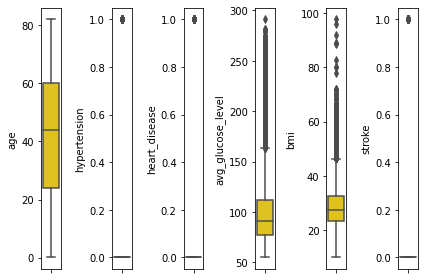

In [ ]:
features = numericals[1:]
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='gold')
    plt.tight_layout()

There are outliers in `avg_glucose_level` and `bmi` columns. Therefore, these columns need to be proceed further

In [ ]:
Q1_agl = np.percentile(data['avg_glucose_level'], 25, interpolation = 'midpoint') 
#Q2 = np.percentile(data, 50, interpolation = 'midpoint') 
Q3_agl = np.percentile(data['avg_glucose_level'], 75, interpolation = 'midpoint') 
IQR_agl = Q3_agl - Q1_agl
low_lim_agl = Q1_agl - 1.5 * IQR_agl
up_lim_agl = Q3_agl + 1.5 * IQR_agl

In [ ]:
outlier_avg = []
for x in data['avg_glucose_level']:
    if ((x> up_lim_agl) or (x<low_lim_agl)):
         outlier_avg.append(x)
print('There are', len(outlier_avg), 'outliers in avg_glucose_level column and it is', round(len(outlier_avg)/len(data)*100,2),'% of the total data' )

There are 4978 outliers in avg_glucose_level column and it is 11.47 % of the total data


In [ ]:
Q1_bmi = np.percentile(data['bmi'], 25, interpolation = 'midpoint') 
Q3_bmi = np.percentile(data['bmi'], 75, interpolation = 'midpoint') 
IQR_bmi = Q3_bmi - Q1_bmi
low_lim_bmi = Q1_bmi - 1.5 * IQR_bmi
up_lim_bmi = Q3_bmi + 1.5 * IQR_bmi

In [ ]:
outlier_bmi = []
for x in data['bmi']:
    if ((x> up_lim_bmi) or (x<low_lim_bmi)):
         outlier_bmi.append(x)
print('There are', len(outlier_bmi), 'outliers in bmi column and it is', round(len(outlier_bmi)/len(data)*100,2), '% of the total data' )

There are 1084 outliers in bmi column and it is 2.5 % of the total data


Outliers in `avg_glucose_level` is 11.47% (greater than 5%), so the clip method in pandas is used. Meanwhile, outliers in `bmi` is 2.5% (less than 5%), so it can be dropped

In [ ]:
#outliers handling for avg_glucose_level column
data['avg_glucose_level'] = data['avg_glucose_level'].clip(upper=275)

In [ ]:
#outliers handling for bmi column

print(f'number of rows before filtering outliers are {len(data)} rows')

filtered_entries = np.array([True] * len(data))
for col in ['bmi']:
    filtered_entries = ((data[col] >= low_lim_bmi) & (data[col] <= up_lim_bmi)) & filtered_entries
    
data_filtered= data[filtered_entries]

print(f'number of rows after filtering outliers are {len(data_filtered)} rows')

number of rows before filtering outliers are 43389 rows
number of rows after filtering outliers are 42305 rows


####KDE plot

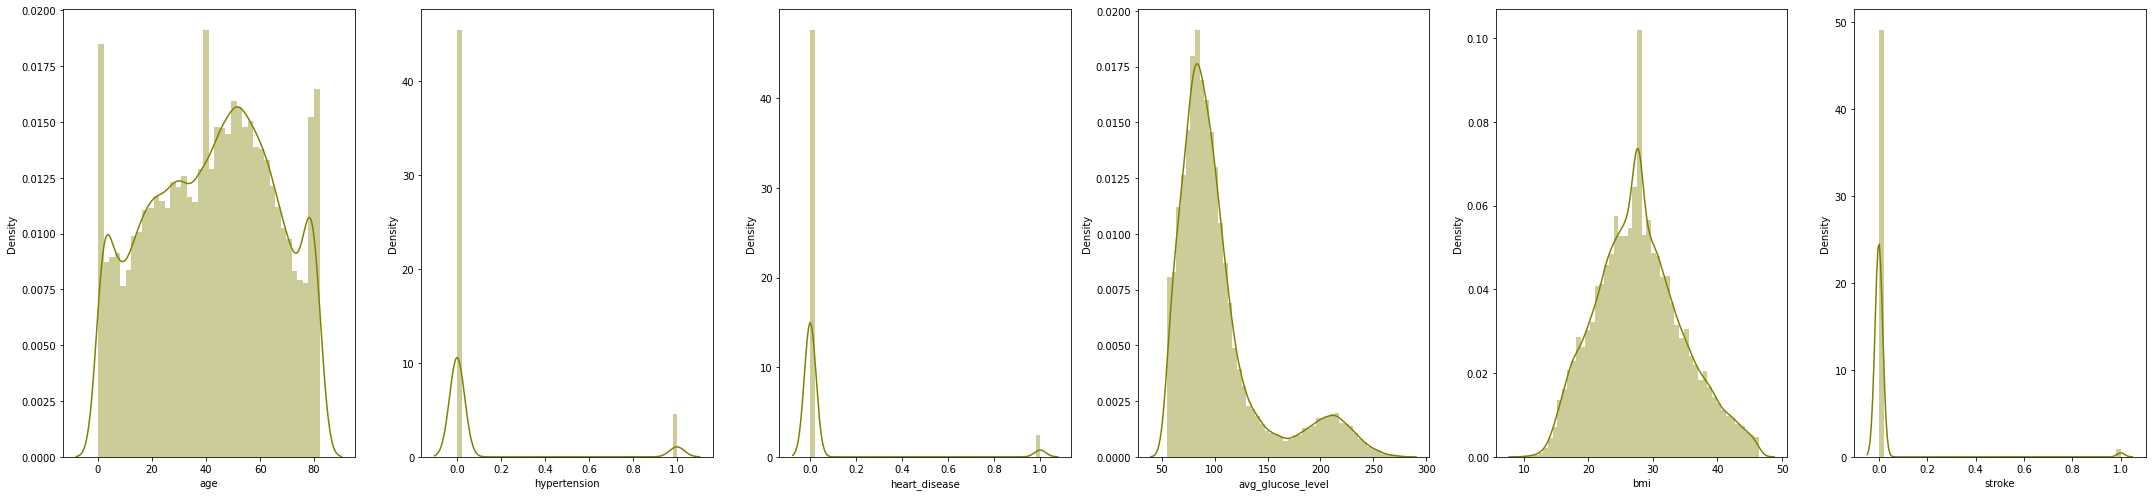

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

features = numericals[1:]
plt.figure(figsize=(30,7))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=data_filtered[features[i]], color='olive')
    plt.xlabel(features[i])
    plt.tight_layout()

1. `avg_glucose_level` is positively skewed
2. `bmi` is slightly symmetrical distribution

####Barplot

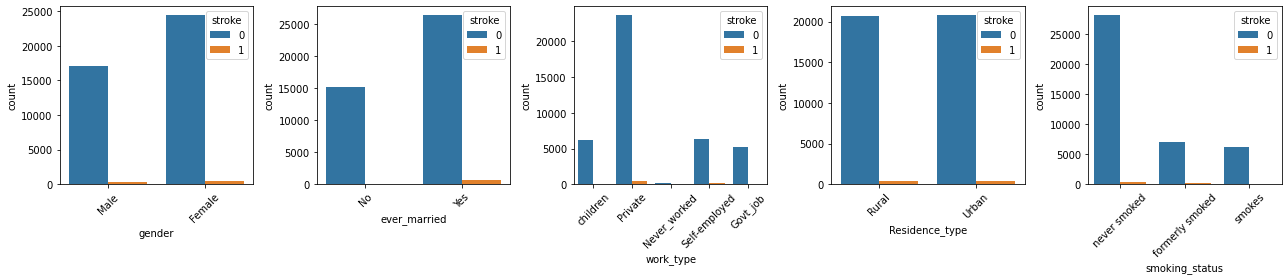

In [ ]:
features = categoricals
plt.figure(figsize=(18,4))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(data=data_filtered,
            x=features[i],
            hue='stroke')
    plt.xticks(rotation=45)
    plt.tight_layout()

1. Male ~ Female to have stroke
2. People who has married is more likely to have stroke
3. People who work in private and self-employed are more likely to have stroke
4. Urban ~ rural people to have stroke
5. People who never smoked has tendency to have stroke

###Multivariate (Bivariate) Analysis

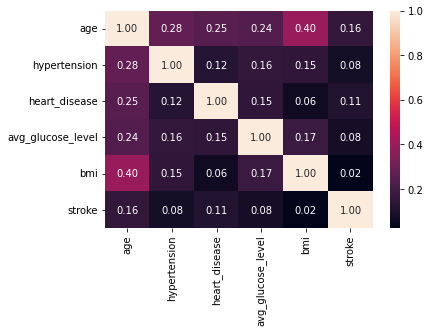

In [ ]:
#Heat Map
correlation = data_filtered.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

There is no redundant features in this dataset. Therefore, all columns is used.

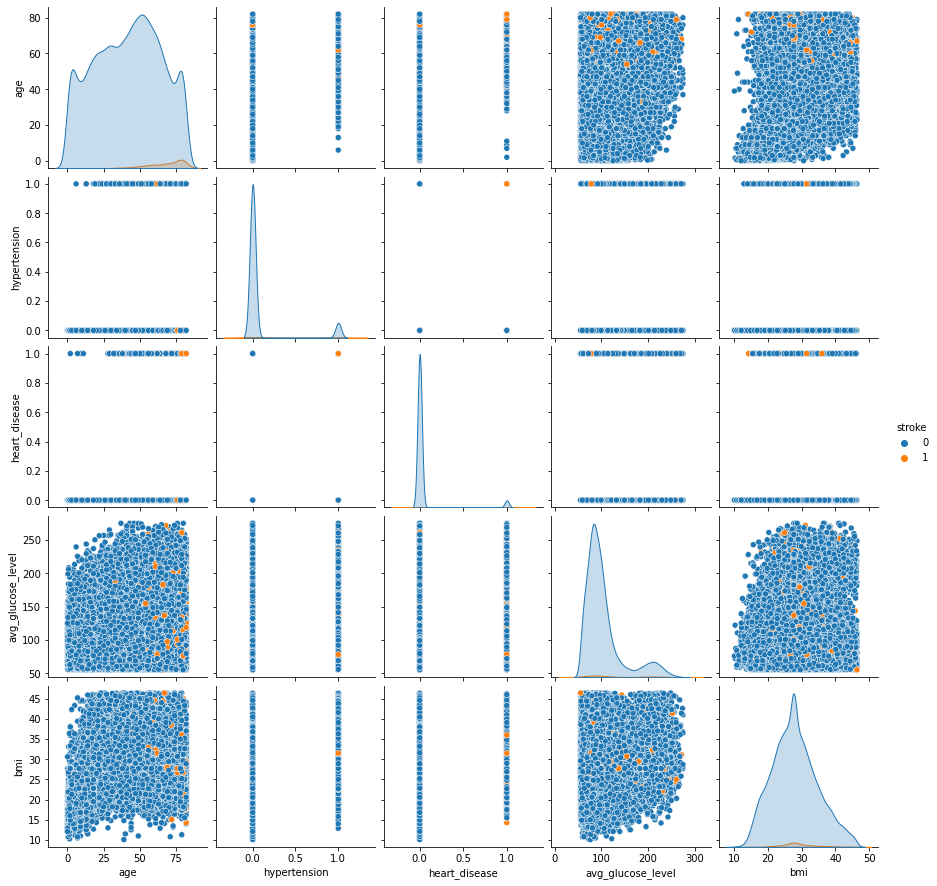

In [ ]:
#Pair Plot
sns.pairplot(data_filtered, hue='stroke')

1. People who are 50-75 years old tend to have stroke
2. People who have hypertension and heart disease tend to have stroke
3. People who have normal average glucose level (in range 75-125) tend to have stroke
4. People who have excess weight (bmi value more than 25) tend to have stroke

#Modelling machine learning

##Split Data

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_filtered, test_size=0.20, random_state=6)

##Categorical feature handling

In [ ]:
# convert columns with 2 distinct values to boolean
bool_categoricals = ['gender','ever_married', 'Residence_type']

for feature in bool_categoricals:
  if feature == 'gender':
    train_data[feature] = train_data[feature].apply(lambda x: 1 if x=='Female' else 0).astype(int)
    test_data[feature] = test_data[feature].apply(lambda x: 1 if x=='Female' else 0).astype(int)
  if feature == 'Residence_type':
    train_data[feature] = train_data[feature].apply(lambda x: 1 if x=='Urban' else 0).astype(int)
    test_data[feature] = test_data[feature].apply(lambda x: 1 if x=='Urban' else 0).astype(int)
  else :
    train_data[feature] = train_data[feature].apply(lambda x: 1 if x=='Yes' else 0).astype(int)
    test_data[feature] = test_data[feature].apply(lambda x: 1 if x=='Yes' else 0).astype(int)

In [ ]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

train_data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
32317,0,24.0,0,0,0,0,87.45,23.4,0,1,0,0,0,0,0,1,0
24317,0,66.0,1,0,1,0,123.46,31.2,0,1,0,0,0,0,0,1,0
7455,0,46.0,0,0,1,1,128.77,27.8,0,0,0,1,0,0,0,1,0
17804,0,82.0,0,0,1,1,80.91,26.9,0,1,0,0,0,0,0,1,0
16435,0,78.0,0,0,1,1,243.22,28.1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32924,0,16.0,0,0,0,1,72.14,26.8,0,0,0,0,1,0,0,1,0
42361,0,30.0,0,0,1,1,87.28,22.5,0,0,0,1,0,0,0,1,0
4834,0,17.0,0,0,0,1,63.28,40.2,0,0,0,1,0,0,0,1,0
42248,0,63.0,0,0,1,1,106.77,22.4,0,1,0,0,0,0,0,1,0


In [ ]:
x_train = train_data.drop(columns='stroke')
x_test = test_data.drop(columns='stroke')

y_train = train_data['stroke']
#y_train = y_train.reshape(len(y_train),)

y_test = test_data['stroke']
#y_test = y_test.reshape(len(y_test),)

##Imbalance Data

In [ ]:
train_data['stroke'].value_counts()

0    33219
1      625
Name: stroke, dtype: int64

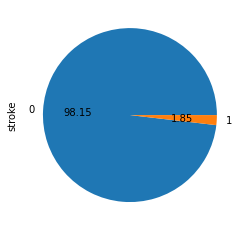

In [ ]:
train_data['stroke'].value_counts().plot.pie(autopct='%.2f')

It is known that people who has stroke is very rare compared to people who don't have stroke. Therefore, this data is called imbalanced data and it needs to be proceed further since the focus of this project is the people who tend to have stroke

###Oversampling Method

####Random Over Sampler 

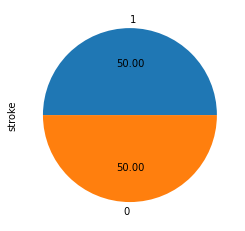

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='not majority', random_state=6)
x_train_res, y_train_res = ros.fit_resample(x_train,y_train)

ax = y_train_res.value_counts().plot.pie(autopct='%.2f')

In [ ]:
y_train_res.value_counts()

1    33219
0    33219
Name: stroke, dtype: int64

####SMOTE Algorithm

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 33219, 1: 625})
After oversampling:  Counter({0: 33219, 1: 33219})


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
def eval_classification(model, pred, x_train_res, y_train_res, x_test, y_test):
    print("Recall score (Test Set): %.2f" % recall_score(y_test, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))

###Metric Choice

####Logistic Regression

In [ ]:
model = LogisticRegression(random_state=6)
model.fit(x_train_res, y_train_res)
y_pred = model.predict(x_test)
eval_classification(model, y_pred, x_train_res, y_train_res, x_test, y_test)

Recall score (Test Set): 0.82
F1-Score (Test Set): 0.10
AUC: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


####Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 6)
dt.fit(x_train_res, y_train_res)
y_pred = dt.predict(x_test)
eval_classification(model, y_pred, x_train_res, y_train_res, x_test, y_test)
#print('recall score using decision tree classifier is', recall_score(y_test, y_pred))

Recall score (Test Set): 0.03
F1-Score (Test Set): 0.04
AUC: 0.51


#####Hyperparameter Tunning (RandomizedSearchCV)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#n_estimators = [200, 250, 300, 350]
#max_features = ['auto', 'sqrt', 'log2']
max_depth = [1,3,5,7]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]

random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier( random_state = 6)
dt_random = RandomizedSearchCV(estimator = dt, 
                              param_distributions = random_grid,
                              cv = 5,
                              scoring = 'recall')

dt_random.fit(x_train_res, y_train_res)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=6),
                   param_distributions={'max_depth': [1, 3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='recall')

In [ ]:
dt_random.best_params_

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [ ]:
final_dt = DecisionTreeClassifier(max_depth = 7, min_samples_split = 10, min_samples_leaf = 4, random_state = 6)
final_dt.fit(x_train_res, y_train_res)
y_pred = final_dt.predict(x_test)

print('recall:', recall_score(y_test, y_pred))

recall: 0.7074829931972789


#####Hyperparameter Tunning (GridSearchCV)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    # 'n_estimators': (200, 250, 300, 350),
    # 'max_features': ('auto', 'sqrt', 'log2'),
    'max_depth': (1,3,5,7),
    'min_samples_split':(2, 5, 10),
    'min_samples_leaf': (1, 2, 4)
    # 'bootstrap': (True, False)
}

# note: we use recall
dt_gridcv = GridSearchCV(dt, parameters, cv=5, scoring='recall')
dt_gridcv.fit(x_train_res, y_train_res)

CPU times: user 16.1 s, sys: 39.7 ms, total: 16.1 s
Wall time: 16.1 s


In [ ]:
cv_result = pd.DataFrame(dt_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
35,"{'max_depth': 7, 'min_samples_leaf': 4, 'min_s...",0.913152,1
33,"{'max_depth': 7, 'min_samples_leaf': 4, 'min_s...",0.913152,1
32,"{'max_depth': 7, 'min_samples_leaf': 2, 'min_s...",0.913152,1
31,"{'max_depth': 7, 'min_samples_leaf': 2, 'min_s...",0.913152,1
30,"{'max_depth': 7, 'min_samples_leaf': 2, 'min_s...",0.913152,1
29,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.913152,1
28,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.913152,1
27,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.913152,1
34,"{'max_depth': 7, 'min_samples_leaf': 4, 'min_s...",0.913152,1
0,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.879737,10


The best model is when the hyperparameters is {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}

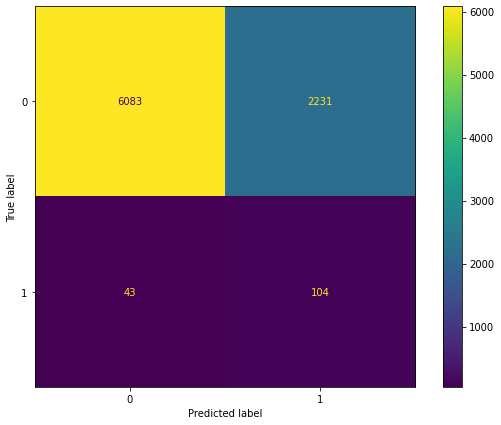

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = dt_gridcv.best_estimator_.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels=dt_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      8314
           1       0.04      0.71      0.08       147

    accuracy                           0.73      8461
   macro avg       0.52      0.72      0.46      8461
weighted avg       0.98      0.73      0.83      8461



####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 6)
rf.fit(x_train_res, y_train_res)
y_pred = rf.predict(x_test)
eval_classification(model, y_pred, x_train_res, y_train_res, x_test, y_test)
#print('recall score using random forest classifier is', recall_score(y_test, y_pred))

Recall score (Test Set): 0.02
F1-Score (Test Set): 0.03
AUC: 0.51


#####Hyperparameter Tunning (RandomizedSearchCV)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = [1,3,5,7]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, random_state = 6)
rf_random = RandomizedSearchCV(estimator = rf, 
                              param_distributions = random_grid,
                              n_iter = 9,
                              cv = 5,
                              scoring = 'recall')

rf_random.fit(x_train_res, y_train_res)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=6),
                   n_iter=9,
                   param_distributions={'max_depth': [1, 3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='recall')

In [ ]:
rf_random.best_params_

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}

In [ ]:
final_rf = RandomForestClassifier(max_depth = 7, min_samples_split = 10, min_samples_leaf = 1,
                                 n_jobs = -1, random_state = 6)
final_rf.fit(x_train_res, y_train_res)
y_pred = final_rf.predict(x_test)

print('recall:', recall_score(y_test, y_pred))

recall: 0.7891156462585034


#####Hyperparameter Tunning (GridSearchCV)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': (1,3,5,7),
    'min_samples_split':(2, 5, 10),
    'min_samples_leaf': (1, 2, 4)
}

# note: we use recall
rf_gridcv = GridSearchCV(rf, parameters, cv=5, scoring='recall')
rf_gridcv.fit(x_train_res, y_train_res)

CPU times: user 1min 11s, sys: 4.22 s, total: 1min 15s
Wall time: 5min 32s


In [ ]:
cv_result = pd.DataFrame(rf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
27,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.888468,1
28,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.888468,1
29,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.888468,1
35,"{'max_depth': 7, 'min_samples_leaf': 4, 'min_s...",0.886390,4
34,"{'max_depth': 7, 'min_samples_leaf': 4, 'min_s...",0.886390,4
33,"{'max_depth': 7, 'min_samples_leaf': 4, 'min_s...",0.886390,4
31,"{'max_depth': 7, 'min_samples_leaf': 2, 'min_s...",0.885276,7
32,"{'max_depth': 7, 'min_samples_leaf': 2, 'min_s...",0.885276,7
30,"{'max_depth': 7, 'min_samples_leaf': 2, 'min_s...",0.885276,7
25,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s...",0.871850,10


The best model is when the hyperparameters is {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}

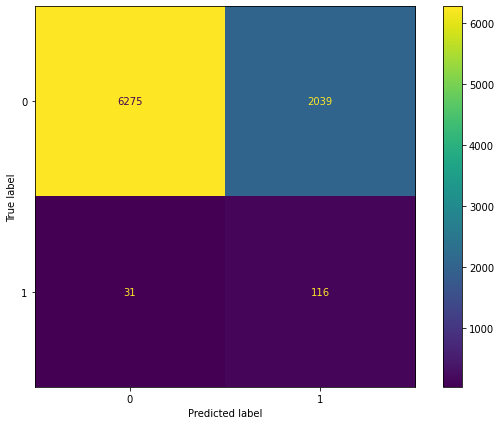

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_gridcv.best_estimator_.predict(x_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86      8314
           1       0.05      0.79      0.10       147

    accuracy                           0.76      8461
   macro avg       0.52      0.77      0.48      8461
weighted avg       0.98      0.76      0.85      8461



####XGBoost

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=6)
xg.fit(x_train_res, y_train_res)

y_pred = xg.predict(x_test)
eval_classification(model, y_pred, x_train_res, y_train_res, x_test, y_test)

Recall score (Test Set): 0.82
F1-Score (Test Set): 0.11
AUC: 0.79
